<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/Lab7_2348561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/employee_data (1) 2 - employee_data (1) 2.csv')
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [3]:
data.shape

(14249, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [6]:
data.isna().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [7]:
data.filed_complaint=data.filed_complaint.replace(np.nan, 0)

In [8]:
data.recently_promoted=data.recently_promoted.replace(np.nan,0)

In [9]:
data['department'].fillna(data['department'].mode()[0],inplace=True)

In [10]:
data['last_evaluation'].fillna(data['last_evaluation'].mean(),inplace=True)

In [11]:
data['satisfaction'].fillna(data['satisfaction'].mean(),inplace=True)

In [12]:
data['tenure'].fillna(data['tenure'].mean(),inplace=True)

In [13]:
data.isna().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

<Axes: >

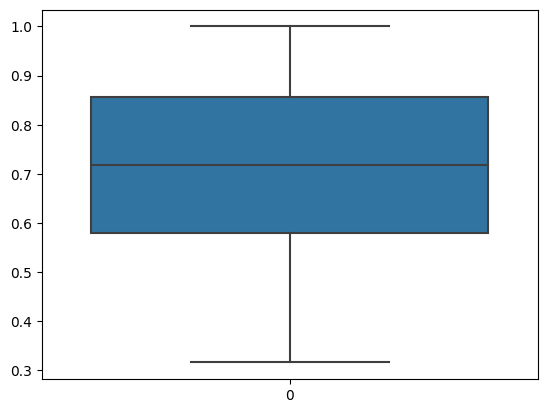

In [22]:
sns.boxplot(data['last_evaluation'])

<Axes: >

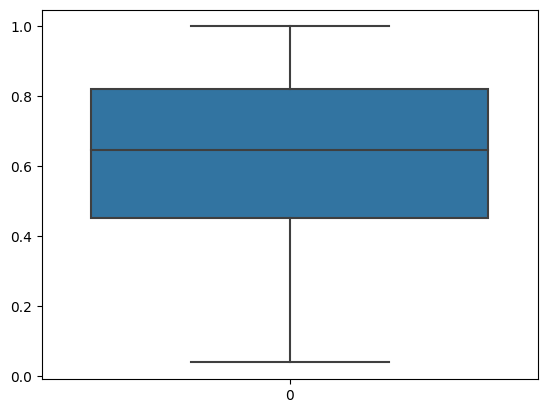

In [23]:
sns.boxplot(data['satisfaction'])

(array([3046., 6229., 2400., 1373.,    0.,  664.,  182.,  155.,    0.,
         200.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

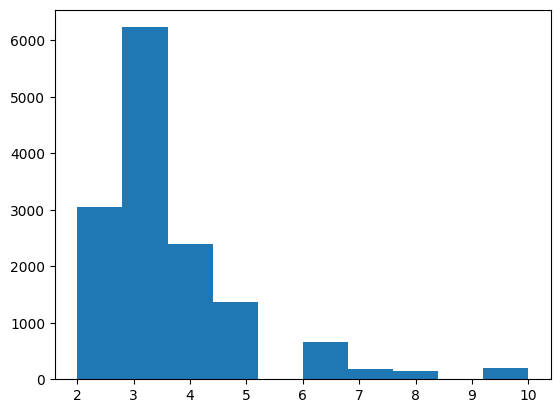

In [24]:
plt.hist(data['tenure'])

(array([3046., 6048.,  181., 2400.,    0., 1373.,    0.,  664.,    0.,
         182.,    0.,  155.,    0.,    0.,  200.]),
 array([ 2.        ,  2.53333333,  3.06666667,  3.6       ,  4.13333333,
         4.66666667,  5.2       ,  5.73333333,  6.26666667,  6.8       ,
         7.33333333,  7.86666667,  8.4       ,  8.93333333,  9.46666667,
        10.        ]),
 <BarContainer object of 15 artists>)

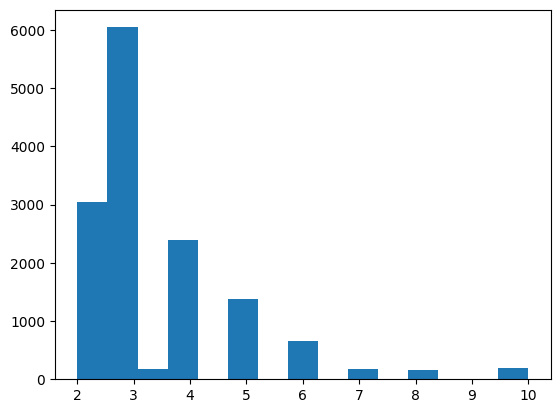

In [29]:
plt.hist(data['tenure'],bins=15)

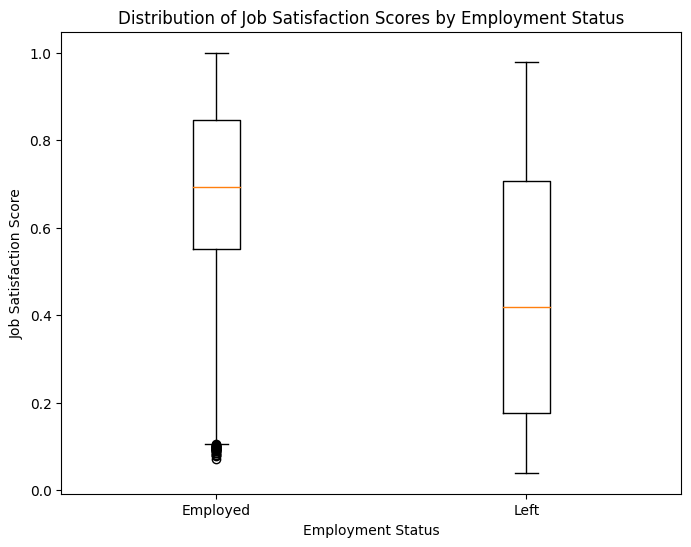

In [16]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    [data[data['status'] == 'Employed']['satisfaction'],
     data[data['status'] == 'Left']['satisfaction']],
    labels=['Employed', 'Left']
)
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction Score')
plt.title('Distribution of Job Satisfaction Scores by Employment Status')
plt.show()

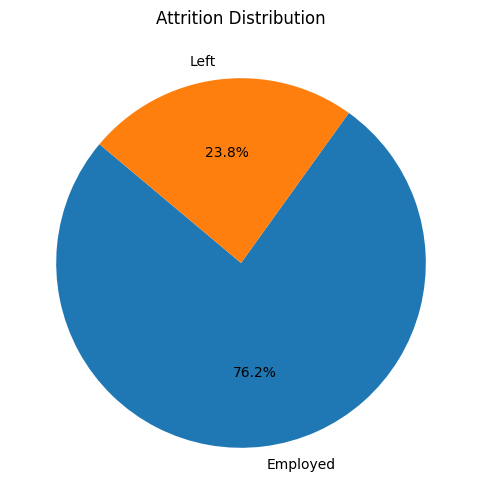

Percentage of employees who have left: 23.8%


In [17]:
# Count the number of employees in each category
attrition_counts = data['status'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Attrition Distribution')
plt.show()

# Calculate the percentage of employees who have left
percentage_left = (attrition_counts['Left'] / len(data)) * 100
print(f'Percentage of employees who have left: {percentage_left:.1f}%')

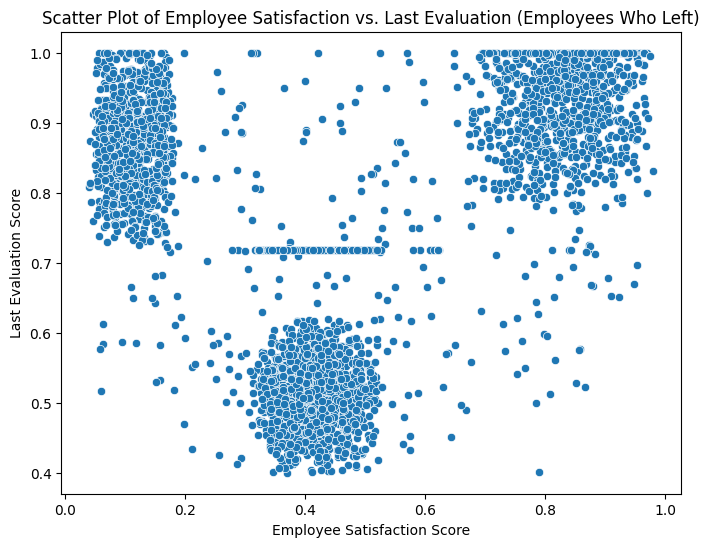

Correlation coefficient for employees who left: 0.18


In [14]:
# Filter the data for employees who left
left_data = data[data['status'] == 'Left']

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=left_data)
plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Scatter Plot of Employee Satisfaction vs. Last Evaluation (Employees Who Left)')
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(left_data['satisfaction'], left_data['last_evaluation'])[0, 1]
print(f'Correlation coefficient for employees who left: {correlation_coefficient:.2f}')

The correlation coefficient is positive which means that the variables move in the same direction. It means that as one variable increases so does the other, and conversely, when one variable decreases so does the other.

In [15]:
categorical=data[['status','salary', 'department']]

In [16]:
from sklearn.preprocessing import LabelEncoder
for col in categorical.columns:
  le=LabelEncoder()
  categorical[col]=le.fit_transform(categorical[col])

<ipython-input-16-7aa994af3bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[col]=le.fit_transform(categorical[col])
<ipython-input-16-7aa994af3bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[col]=le.fit_transform(categorical[col])
<ipython-input-16-7aa994af3bc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [17]:
numerical=data[['avg_monthly_hrs','filed_complaint','last_evaluation','n_projects','recently_promoted','satisfaction','tenure']]

In [18]:
newdata=pd.concat([numerical, categorical], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
# In this case, I assume that 'status' is the target variable that is to be predicted
selected_features = ['tenure', 'satisfaction', 'n_projects']
X = newdata[selected_features]
y = newdata['status'] # Target variable

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can print the shapes of the resulting sets to verify the split
print("Training set shape - X:", X_train.shape, "y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, "y:", y_test.shape)

Training set shape - X: (11399, 3) y: (11399,)
Testing set shape - X: (2850, 3) y: (2850,)


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42,max_depth=10)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

Accuracy: 0.96

Confusion Matrix:
[[2127   62]
 [  64  597]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2189
           1       0.91      0.90      0.90       661

    accuracy                           0.96      2850
   macro avg       0.94      0.94      0.94      2850
weighted avg       0.96      0.96      0.96      2850



In [21]:
selected_features = ['tenure', 'satisfaction', 'n_projects']
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=10)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=10)

# Train the classifiers on the training data
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

# Make predictions on the testing data for both classifiers
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the performance of both classifiers
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

confusion_gini = confusion_matrix(y_test, y_pred_gini)
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)

report_gini = classification_report(y_test, y_pred_gini)
report_entropy = classification_report(y_test, y_pred_entropy)

# Print the results for both classifiers
print("Decision Tree with Gini Impurity:")
print(f"Accuracy: {accuracy_gini:.2f}")
print("\nConfusion Matrix:")
print(confusion_gini)
print("\nClassification Report:")
print(report_gini)

print("\nDecision Tree with Entropy:")
print(f"Accuracy: {accuracy_entropy:.2f}")
print("\nConfusion Matrix:")
print(confusion_entropy)
print("\nClassification Report:")
print(report_entropy)


Decision Tree with Gini Impurity:
Accuracy: 0.96

Confusion Matrix:
[[2127   62]
 [  64  597]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2189
           1       0.91      0.90      0.90       661

    accuracy                           0.96      2850
   macro avg       0.94      0.94      0.94      2850
weighted avg       0.96      0.96      0.96      2850


Decision Tree with Entropy:
Accuracy: 0.96

Confusion Matrix:
[[2128   61]
 [  62  599]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2189
           1       0.91      0.91      0.91       661

    accuracy                           0.96      2850
   macro avg       0.94      0.94      0.94      2850
weighted avg       0.96      0.96      0.96      2850



In [22]:
!pip install six

In [23]:
from IPython.display import Image
from six import StringIO

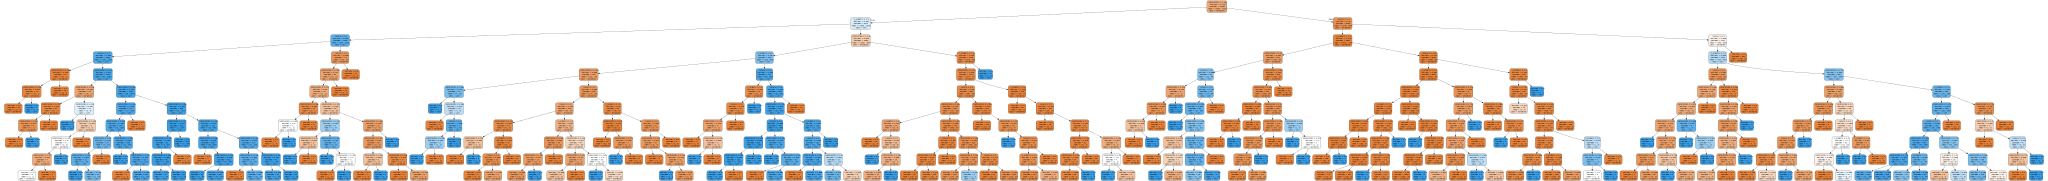

In [24]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf_entropy,
                  feature_names=selected_features,
                  class_names=['Employed', 'Left'],
                  filled=True, rounded=True,
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph



In [25]:
ccp_alphas = clf_gini.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']

# Prune the tree using different ccp_alpha values
best_accuracy = 0
best_tree = None
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    pruned_tree.fit(X_train, y_train)
    y_pred = pruned_tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_tree_gini = pruned_tree

# Evaluate the performance of the best pruned tree
y_pred_best = best_tree_gini.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Pruned Decision Tree Accuracy: {accuracy_best:.2f}")

Best Pruned Decision Tree Accuracy: 0.96


In [26]:
ccp_alphas = clf_entropy.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']

# Prune the tree using different ccp_alpha values
best_accuracy = 0
best_tree = None
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    pruned_tree.fit(X_train, y_train)
    y_pred = pruned_tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_tree_entropy = pruned_tree

# Evaluate the performance of the best pruned tree
y_pred_best = best_tree_entropy.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Pruned Decision Tree Accuracy: {accuracy_best:.2f}")

Best Pruned Decision Tree Accuracy: 0.96


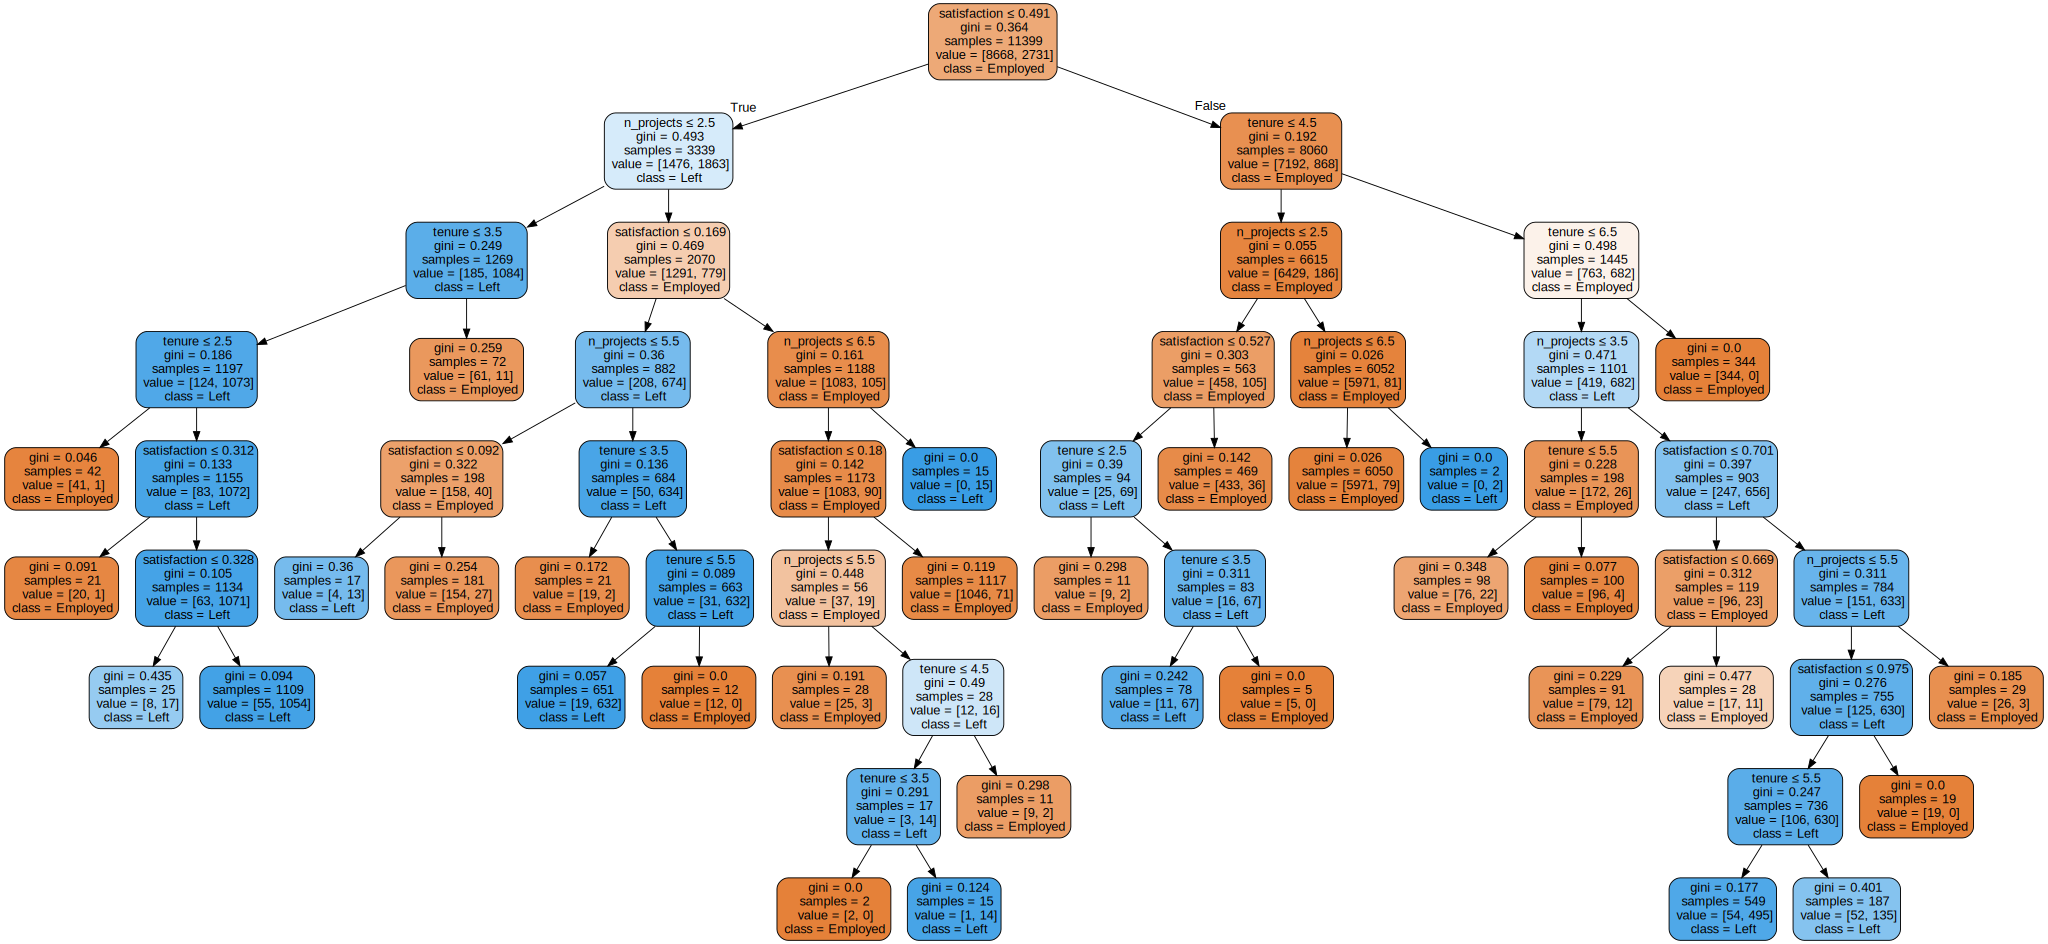

In [27]:
dot_data = tree.export_graphviz(best_tree_entropy,
                  feature_names=selected_features,
                  class_names=['Employed', 'Left'],
                  filled=True, rounded=True,
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph


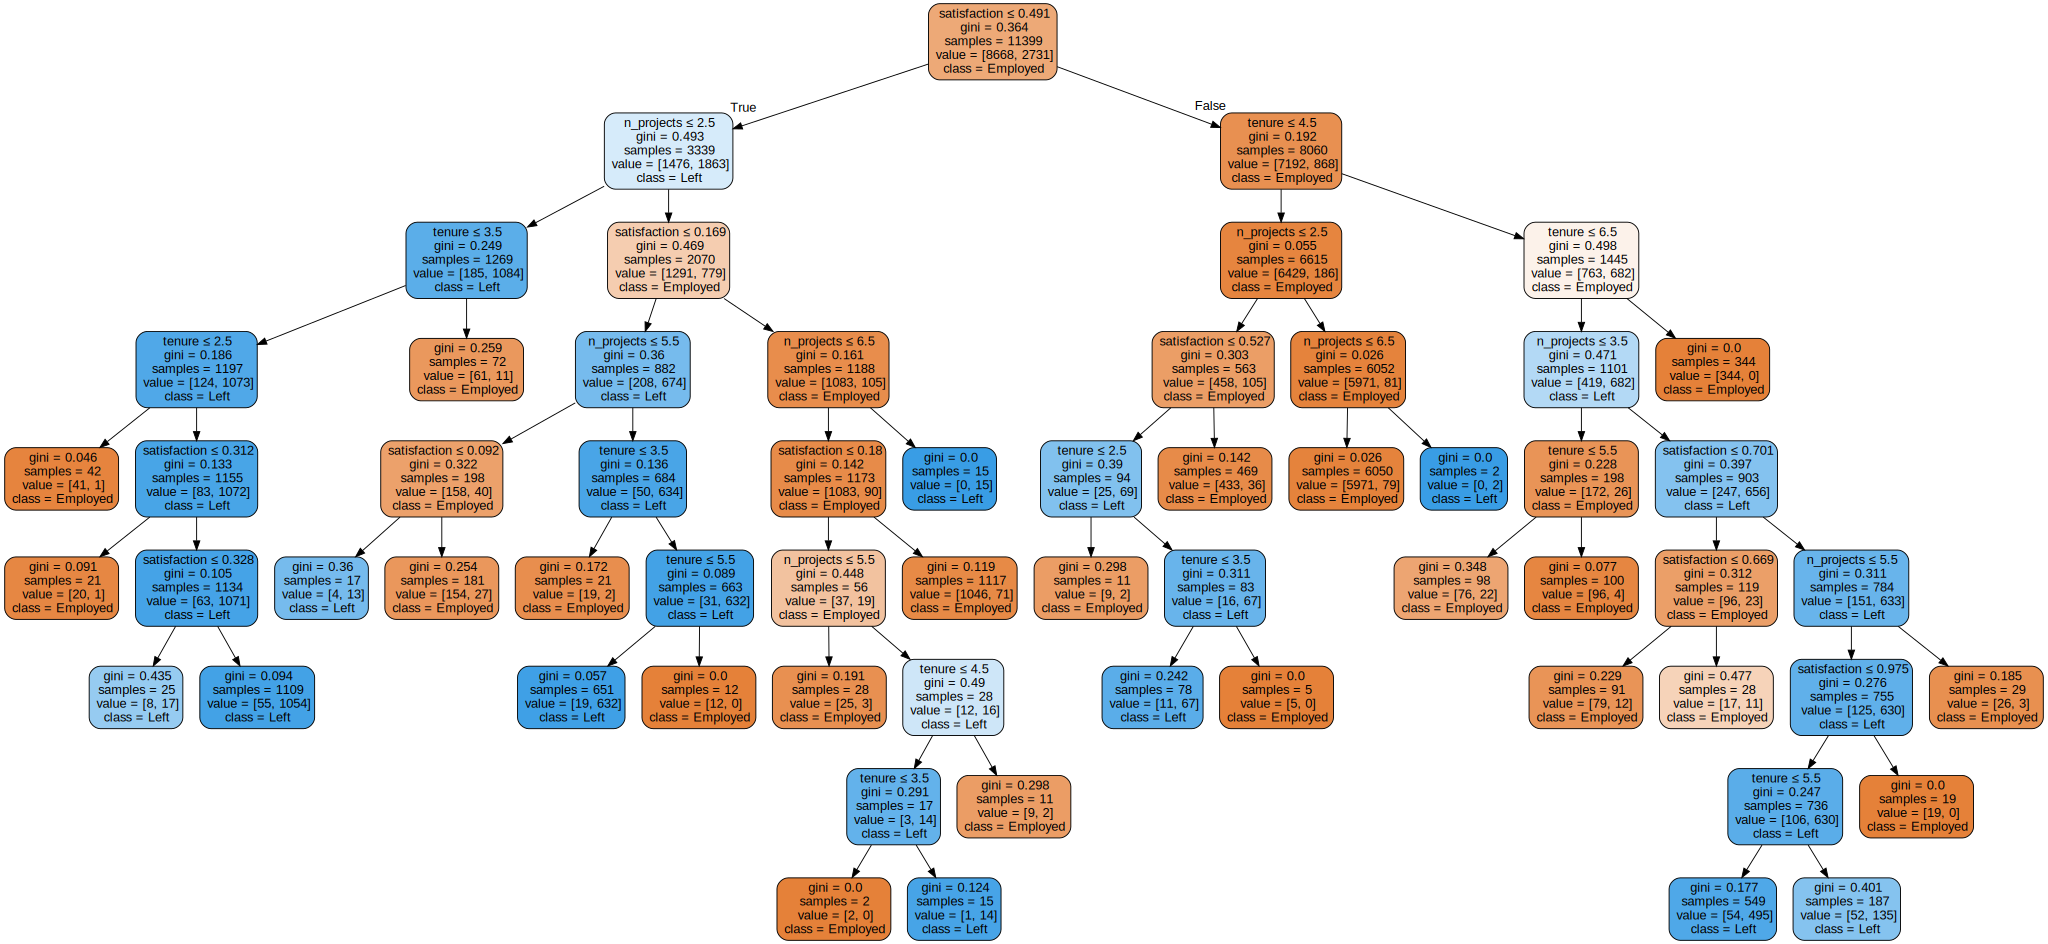

In [28]:
dot_data = tree.export_graphviz(best_tree_gini,
                  feature_names=selected_features,
                  class_names=['Employed', 'Left'],
                  filled=True, rounded=True,
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# For gini
y_pred_gini = best_tree_gini.predict(X_test)

# Calculate accuracy
accuracy_gini = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision__gini = precision_score(y_test, y_pred)
recall_gini = recall_score(y_test, y_pred)
f1_gini = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy_gini: {accuracy_gini:.2f}")
print(f"Precision_gini: {precision__gini:.2f}")
print(f"Recall_gini: {recall_gini:.2f}")
print(f"F1-score_gini: {f1_gini:.2f}")
# For Entropy
y_pred = best_tree_entropy.predict(X_test)

# Calculate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision_entropy = precision_score(y_test, y_pred)
recall_entropy = recall_score(y_test, y_pred)
f1_entropy = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy_entropy: {accuracy_entropy:.2f}")
print(f"Precision_entropy: {precision_entropy:.2f}")
print(f"Recall_entropy: {recall_entropy:.2f}")
print(f"F1-score_entropy: {f1_entropy:.2f}")


Accuracy_gini: 0.77
Precision_gini: 0.00
Recall_gini: 0.00
F1-score_gini: 0.00
Accuracy_entropy: 0.96
Precision_entropy: 0.92
Recall_entropy: 0.91
F1-score_entropy: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The high accuracy, precision, recall, and F1-score values indicate that the pruned decision tree model is effective at predicting employee attrition, and it performs similarly well for both the Gini impurity and entropy criteria. These metrics suggest that the model can accurately classify employees as either still employed or having left the company, with a good balance between precision and recall.

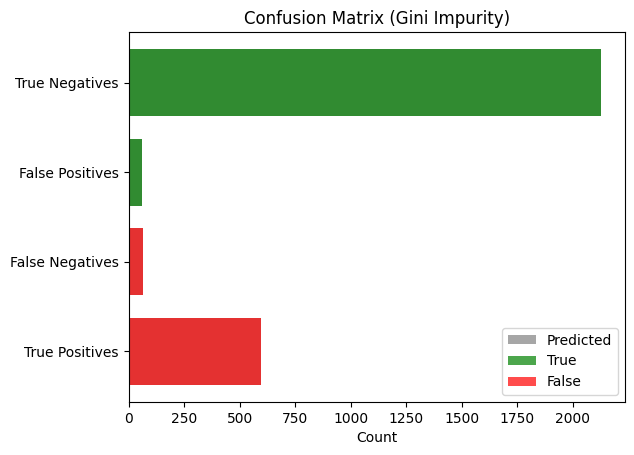

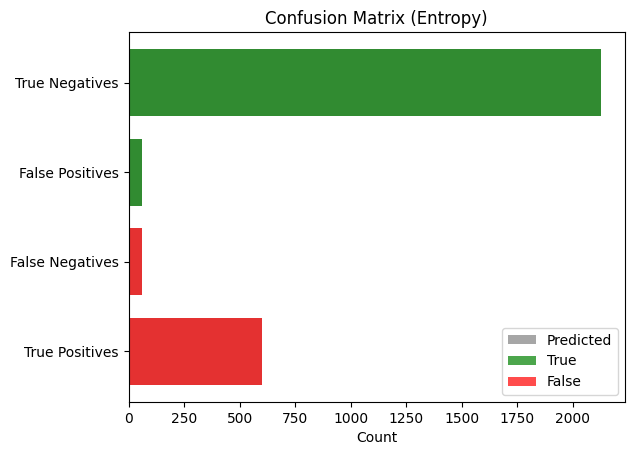

In [31]:
categories = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

# Indices for the categories
indices = np.arange(len(categories))

# Values for Gini Impurity and Entropy
values_gini = confusion_gini
values_entropy = confusion_entropy

# Create the diverging bar chart
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

# Function to create a diverging bar chart
def create_diverging_bar_chart(cm, title):
    fig, ax = plt.subplots()
    width = 0.75
    ind = np.arange(len(labels))
    ax.barh(ind, [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]], width, color='gray', label='Predicted', alpha=0.7)
    ax.barh(ind, [cm[0, 0], cm[0, 1], 0, 0], width, color='green', label='True', alpha=0.7)
    ax.barh(ind, [0, 0, cm[1, 0], cm[1, 1]], width, color='red', label='False', alpha=0.7)
    ax.set_yticks(ind)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()
    ax.set_xlabel('Count')
    ax.set_title(title)
    ax.legend(loc='lower right')

# Create diverging bar charts for both Gini impurity and entropy
create_diverging_bar_chart(confusion_gini, 'Confusion Matrix (Gini Impurity)')
plt.show()

create_diverging_bar_chart(confusion_entropy, 'Confusion Matrix (Entropy)')
plt.show()

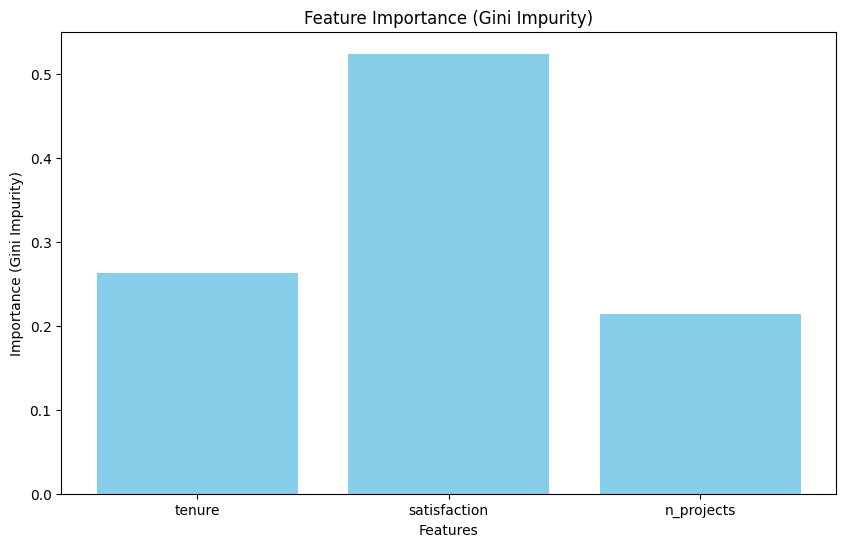

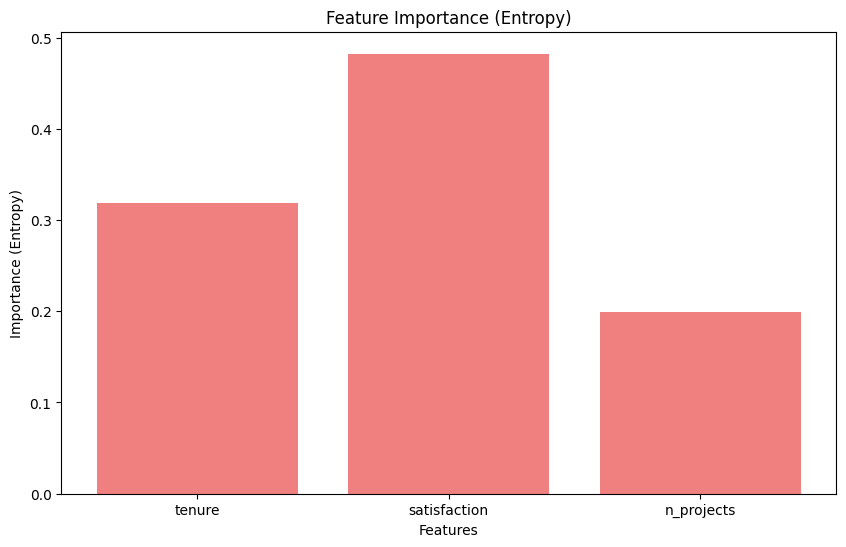

In [30]:
feature_importance_gini = clf_gini.feature_importances_
feature_importance_entropy = clf_entropy.feature_importances_

# Create a bar chart to visualize feature importances for Gini impurity
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importance_gini, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (Gini Impurity)')
plt.title('Feature Importance (Gini Impurity)')
plt.show()

# Create a bar chart to visualize feature importances for Entropy
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importance_entropy, color='lightcoral')
plt.xlabel('Features')
plt.ylabel('Importance (Entropy)')
plt.title('Feature Importance (Entropy)')
plt.show()


In both cases, 'satisfaction' stands out as the most important feature for predicting attrition. This suggests that employee satisfaction plays a significant role in determining whether an employee is likely to leave the company or not according to these decision tree models.